In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
#Loading the dataset
import pandas as pd

# Load the datasets
cricket_jersey_df = pd.read_csv('combined_product_data_Amazon_1001_2000_cricketJersey.csv')
cycling_jersey_df = pd.read_csv('combined_product_data_Amazon_Cycling_Jersey.csv')

# Display the first few rows of each dataframe
print("Cricket Jersey Data:")
print(cricket_jersey_df.sample(5))

print("\nCycling Jersey Data:")
print(cycling_jersey_df.sample(5))


Cricket Jersey Data:
                                          ProductTitle  \
34   Sports Cricket chennai Official New Dhoni 7 Je...   
985                 India Fan Jersey Men's Regular Fit   
684  Killer Blue New Cricket Jersey 2023-2024 Crick...   
315  Ipl Royal Challengers Banglore New IPL 2021 Cr...   
527          Newzealand ODI Jersey 2023 (Full Sleeves)   

                                        LandingPageURL  \
34   https://www.amazon.in/Cricket-chennai-Official...   
985  https://www.amazon.in/T10-Sports-India-Jersey-...   
684  https://www.amazon.in/JUSBALL-Killer-Cricket-J...   
315  https://www.amazon.in/Mentific-Challengers-Ban...   
527  https://www.amazon.in/Newzealand-Jersey-Sleeve...   

                                        MasterCategory  \
34                                                 NaN   
985                                                NaN   
684                                                NaN   
315  ['Clothing & Accessories', 'Men', 'T-shirts,

In [25]:
cricket_jersey_df.columns.tolist()

['ProductTitle',
 'LandingPageURL',
 'MasterCategory',
 'SubCategory',
 'ASIN',
 'Product_description',
 'BulletPoints',
 'NumberOfBulletPoints',
 'NumberOfVariants',
 'ImageLinks',
 'NumberofImages',
 'AdditionalInformation',
 'Price',
 'MRP',
 'Discount',
 'Rating',
 'Review',
 'AllStartCounts',
 'Brand',
 'ProductDetails']

In [26]:
#Data Cleaning
# Check for missing values
print("Missing values in Cricket Jersey Data:")
print(cricket_jersey_df.isnull().sum())

Missing values in Cricket Jersey Data:
ProductTitle               0
LandingPageURL             0
MasterCategory           793
SubCategory              793
ASIN                     793
Product_description      799
BulletPoints             793
NumberOfBulletPoints     793
NumberOfVariants         793
ImageLinks               793
NumberofImages           793
AdditionalInformation    793
Price                    793
MRP                      793
Discount                 793
Rating                   793
Review                   793
AllStartCounts           793
Brand                    793
ProductDetails           793
dtype: int64


In [27]:
print("\nMissing values in Cycling Jersey Data:")
print(cycling_jersey_df.isnull().sum())


Missing values in Cycling Jersey Data:
ProductTitle                0
LandingPageURL              0
MasterCategory           1968
SubCategory              1968
ASIN                     1968
Product_description      1969
BulletPoints             1968
NumberOfBulletPoints     1968
NumberOfVariants         1968
ImageLinks               1968
NumberofImages           1968
AdditionalInformation    1968
Price                    1968
MRP                      1968
Discount                 1968
Rating                   1968
Review                   1968
AllStartCounts           1968
Brand                    1968
ProductDetails           1968
dtype: int64


In [28]:
# Drop rows where essential columns are missing
cricket_jersey_df.dropna(subset=['ProductTitle', 'Price', 'Brand'], inplace=True)
cycling_jersey_df.dropna(subset=['ProductTitle', 'Price', 'Brand'], inplace=True)

In [14]:
cricket_jersey_df.sample(5)

,ProductTitle,LandingPageURL,MasterCategory,SubCategory,ASIN,Product_description,BulletPoints,NumberOfBulletPoints,NumberOfVariants,ImageLinks,NumberofImages,AdditionalInformation,Price,MRP,Discount,Rating,Review,AllStartCounts,Brand,ProductDetails
220,Polyester Half Sleeve Jersey with Round Collar...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B08N6S3H9J,This awesome Printed T-shirt with great finish...,"['Care Instructions: Machine Wash', 'Fit Type:...",5.0,"['S', 'M', 'L', 'XL', '2XL']",['https://m.media-amazon.com/images/I/41x9QfZJ...,2.0,"{\n ""Material composition"": ""100% Polyester...",375.0,999.0,-62%,126,3.8,"{'5 star': '40%', '4 star': '28%', '3 star': '...",Visit the JJ TEES Store,"{'Product Dimensions ': '29 x 23 x 1.5 cm', '..."
480,IND Cricket Team Tshirt Virat Kohli 18 2023-24...,https://www.amazon.in/Cricket-Tshirt-2023-24-9...,"['Clothing & Accessories', 'Boys', 'T-Shirts &...",Boys > T-Shirts & Polos > T-Shirts,B0CF539Y1W,"Lightweight and soft, the polyester T-shirt wi...","['Very comforting', 'Wash:- Gentle Hand Wash, ...",5.0,"['12 Months-18 Months', '18 Months-24 Months',...",['https://m.media-amazon.com/images/I/51R+UbCx...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",284.0,899.0,-68%,19,3.7,"{'5 star': '47%', '4 star': '27%', '3 star': '...",Generic,"{'Date First Available ': '9 August 2023', 'M..."
852,Soccer t-Shirts for Men Football Jersey with M...,https://www.amazon.in/Daily-Orders-Customized-...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B09MFXFV17,Try This Premium 100% Polyester all over print...,['Material - These are polyester t-shirt which...,4.0,"['S', 'M', 'L', 'XL', '2XL']",['https://m.media-amazon.com/images/I/41TC5pl8...,5.0,"{\n ""Material composition"": ""100% Polyester...",399.0,999.0,-60%,14,3.6,"{'5 star': '44%', '4 star': '17%', '3 star': '...",Daily Orders,"{'Date First Available ': '23 November 2021',..."
149,DHONI Yellow Jersey 2023-24 -(Mens & Kids) Cri...,https://www.amazon.in/JUSBALL-Yellow-Jersey-20...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B0BWNV2TJZ,"Lightweight and soft, the polyester T-shirt wi...","['Material: 100% Polyester', 'Care Instruction...",5.0,"['2 Years-3 Years', '3 Years-4 Years', '4 Year...",['https://m.media-amazon.com/images/I/4172drOy...,2.0,"{\n ""Material composition"": ""100% Polyester...",249.0,NaN,-81%,5,3.4,"{'5 star': '30%', '4 star': '23%', '3 star': '...",JUSBALL,"{'Date First Available ': '23 February 2023',..."
621,Men's Cotton Regular Fit T-Shirt,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B08XQVNWRB,"The minimal detailing, flattering fit and fine...","['Van Heusen sport Tshirt', 'Material Composit...",3.0,"['S', 'M', 'L', 'XL', '2XL', ' Multi - Blue', ...",['https://m.media-amazon.com/images/I/31IEkX5i...,5.0,"{\n ""Material composition"": ""100% Cotton"",\...",419.0,999.0,-58%,"1,781",4.1,"{'5 star': '52%', '4 star': '24%', '3 star': '...",Visit the Van Heusen Store,{'Product Dimensions ': '26 x 21 x 2 cm; 250 ...


In [29]:
# Convert Price and MRP columns to numeric
cricket_jersey_df['Price'] = pd.to_numeric(cricket_jersey_df['Price'], errors='coerce')
cricket_jersey_df['MRP'] = pd.to_numeric(cricket_jersey_df['MRP'], errors='coerce')

cycling_jersey_df['Price'] = pd.to_numeric(cycling_jersey_df['Price'], errors='coerce')
cycling_jersey_df['MRP'] = pd.to_numeric(cycling_jersey_df['MRP'], errors='coerce')


In [30]:
cricket_jersey_df

,ProductTitle,LandingPageURL,MasterCategory,SubCategory,ASIN,Product_description,BulletPoints,NumberOfBulletPoints,NumberOfVariants,ImageLinks,NumberofImages,AdditionalInformation,Price,MRP,Discount,Rating,Review,AllStartCounts,Brand,ProductDetails
0,MI Jersey Rohit Sharma 45 2024 for Men & Boys,https://www.amazon.in/Jersey-Sharma-2023-2024-...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B0CKPFNZKM,"Lightweight and soft, the polyester T-shirt wi...","['Wash:- Gentle Hand Wash, Do Not Bleach, Dry ...",5.0,"['7 Years-8 Years', '8 Years-9 Years', '9 Year...",['https://m.media-amazon.com/images/I/51T10PjK...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",304.0,899.0,-66%,31,3.1,"{'5 star': '36%', '4 star': '14%', '3 star': '...",Generic,{'Package Dimensions ': '30 x 25 x 1 cm; 150 ...
6,Sports Cricket CSK New Thala Dhoni 7 Jersey 20...,https://www.amazon.in/Sports-Cricket-Thala-Jer...,"['Clothing & Accessories', 'Men', 'Sportswear'...",Men > Sportswear > Sports T-Shirts & Jerseys >...,B0CWS79HB1,"Made of polyester, you'll love the high-qualit...","['Fabric:Polyester', 'Fit/Neck:Regular Fit/Col...",5.0,"['2 Years-3 Years', '3 Years-4 Years', '4 Year...",['https://m.media-amazon.com/images/I/41OkpvZH...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",399.0,999.0,-60%,1 rating,4.0,"{'5 star': '', '4 star': '100%', '3 star': '',...",Generic,"{'Date First Available ': '29 February 2024',..."
7,IND Cricket Team Half Sleeve Tshirt Official S...,https://www.amazon.in/Cricket-Sleeve-Official-...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B0CFB4GMQN,"Lightweight and soft, the polyester T-shirt wi...","['Very comforting', 'Wash:- Gentle Hand Wash, ...",5.0,"['7 Years-8 Years', '8 Years-9 Years', '9 Year...",['https://m.media-amazon.com/images/I/51fabCdC...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",304.0,899.0,-66%,4,3.8,"{'5 star': '71%', '4 star': '', '3 star': '', ...",Generic,"{'Date First Available ': '10 August 2023', '..."
10,Cricket Team Blue Jersey VIrat Kohli 18 Tshirt...,https://www.amazon.in/Cricket-Jersey-VIrat-Tsh...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B0CQ2LDQ9Y,"Lightweight and soft, the polyester T-shirt wi...","['Chest Size: 12-18 to 18-24 Months - 22""; 1 t...",5.0,"['7 Years-8 Years', '8 Years-9 Years', '9 Year...",['https://m.media-amazon.com/images/I/51JG4Ltr...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",284.0,899.0,-68%,1 rating,1.0,"{'5 star': '', '4 star': '', '3 star': '', '2 ...",Generic,{'Package Dimensions ': '30 x 25 x 1 cm; 150 ...
11,GT Cricket Team Original Full Sleeve Jersey Ha...,https://www.amazon.in/Cricket-Original-Sleeve-...,"['Clothing & Accessories', 'Boys', 'T-Shirts &...",Boys > T-Shirts & Polos > T-Shirts,B0CRKVC5M6,"Lightweight and soft, the polyester T-shirt wi...","['Wash:- Gentle Hand Wash, Do Not Bleach, Dry ...",5.0,"['7 Years-8 Years', '8 Years-9 Years', '9 Year...",['https://m.media-amazon.com/images/I/51Lr0mTH...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",299.0,899.0,-67%,1 rating,5.0,"{'5 star': '100%', '4 star': '', '3 star': '',...",Generic,{'Package Dimensions ': '30 x 25 x 1 cm; 150 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,Bangalore Football Jersey Chettri Half Sleeve ...,https://www.amazon.in/woopme%C2%AE-Bangalore-F...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B0CNCM9JNT,Elevate your team's style and performance with...,"['Fit Type- Size Chart: S-38, M-40, L-42, XL-4...",5.0,"['S', 'M', 'L', 'XL', '2XL', '3XL']",['https://m.media-amazon.com/images/I/41CDcCLL...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",395.0,699.0,-43%,2,4.5,"{'5 star': '50%', '4 star': '50%', '3 star': '...",woopme,{'Product Dimensions ': '14 x 5 x 14 cm; 150 ...
991,Thala MS

In [31]:
print(cricket_jersey_df.head(3))

                                        ProductTitle  \
0      MI Jersey Rohit Sharma 45 2024 for Men & Boys   
6  Sports Cricket CSK New Thala Dhoni 7 Jersey 20...   
7  IND Cricket Team Half Sleeve Tshirt Official S...   

                                      LandingPageURL  \
0  https://www.amazon.in/Jersey-Sharma-2023-2024-...   
6  https://www.amazon.in/Sports-Cricket-Thala-Jer...   
7  https://www.amazon.in/Cricket-Sleeve-Official-...   

                                      MasterCategory  \
0  ['Clothing & Accessories', 'Men', 'T-shirts, P...   
6  ['Clothing & Accessories', 'Men', 'Sportswear'...   
7  ['Clothing & Accessories', 'Men', 'T-shirts, P...   

                                         SubCategory        ASIN  \
0          Men > T-shirts, Polos & Shirts > T-Shirts  B0CKPFNZKM   
6  Men > Sportswear > Sports T-Shirts & Jerseys >...  B0CWS79HB1   
7          Men > T-shirts, Polos & Shirts > T-Shirts  B0CFB4GMQN   

                                 Product_description

In [32]:
cricket_jersey_df.head(3)

,ProductTitle,LandingPageURL,MasterCategory,SubCategory,ASIN,Product_description,BulletPoints,NumberOfBulletPoints,NumberOfVariants,ImageLinks,NumberofImages,AdditionalInformation,Price,MRP,Discount,Rating,Review,AllStartCounts,Brand,ProductDetails
0,MI Jersey Rohit Sharma 45 2024 for Men & Boys,https://www.amazon.in/Jersey-Sharma-2023-2024-...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B0CKPFNZKM,"Lightweight and soft, the polyester T-shirt wi...","['Wash:- Gentle Hand Wash, Do Not Bleach, Dry ...",5.0,"['7 Years-8 Years', '8 Years-9 Years', '9 Year...",['https://m.media-amazon.com/images/I/51T10PjK...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",304.0,899.0,-66%,31,3.1,"{'5 star': '36%', '4 star': '14%', '3 star': '...",Generic,{'Package Dimensions ': '30 x 25 x 1 cm; 150 ...
6,Sports Cricket CSK New Thala Dhoni 7 Jersey 20...,https://www.amazon.in/Sports-Cricket-Thala-Jer...,"['Clothing & Accessories', 'Men', 'Sportswear'...",Men > Sportswear > Sports T-Shirts & Jerseys >...,B0CWS79HB1,"Made of polyester, you'll love the high-qualit...","['Fabric:Polyester', 'Fit/Neck:Regular Fit/Col...",5.0,"['2 Years-3 Years', '3 Years-4 Years', '4 Year...",['https://m.media-amazon.com/images/I/41OkpvZH...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",399.0,999.0,-60%,1 rating,4.0,"{'5 star': '', '4 star': '100%', '3 star': '',...",Generic,"{'Date First Available ': '29 February 2024',..."
7,IND Cricket Team Half Sleeve Tshirt Official S...,https://www.amazon.in/Cricket-Sleeve-Official-...,"['Clothing & Accessories', 'Men', 'T-shirts, P...","Men > T-shirts, Polos & Shirts > T-Shirts",B0CFB4GMQN,"Lightweight and soft, the polyester T-shirt wi...","['Very comforting', 'Wash:- Gentle Hand Wash, ...",5.0,"['7 Years-8 Years', '8 Years-9 Years', '9 Year...",['https://m.media-amazon.com/images/I/51fabCdC...,3.0,"{\n ""Material composition"": ""Polyester"",\n ...",304.0,899.0,-66%,4,3.8,"{'5 star': '71%', '4 star': '', '3 star': '', ...",Generic,"{'Date First Available ': '10 August 2023', '..."


Statistics for Cricket Jersey Data:
       NumberOfBulletPoints  NumberofImages       Price         MRP  \
count            207.000000      207.000000  196.000000  136.000000   
mean               4.487923        3.797101  434.729592  922.897059   
std                1.074234        1.581873  164.187552  103.810174   
min                0.000000        1.000000  229.000000  499.000000   
25%                4.000000        3.000000  304.000000  899.000000   
50%                5.000000        3.000000  399.000000  999.000000   
75%                5.000000        5.000000  499.000000  999.000000   
max                6.000000        7.000000  999.000000  999.000000   

           Review  
count  207.000000  
mean     3.690821  
std      0.969317  
min      1.000000  
25%      3.100000  
50%      3.900000  
75%      4.300000  
max      5.000000  

Statistics for Cycling Jersey Data:
       NumberOfBulletPoints  NumberofImages       Price    MRP     Review
count             32.000000      

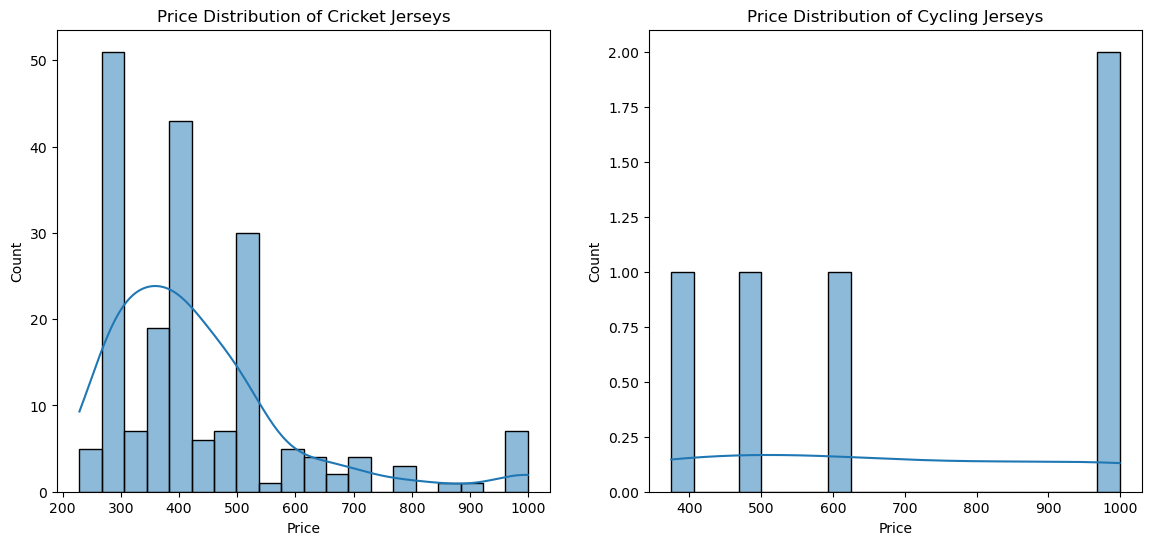

In [33]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print("Statistics for Cricket Jersey Data:")
print(cricket_jersey_df.describe())

print("\nStatistics for Cycling Jersey Data:")
print(cycling_jersey_df.describe())

# Distribution of prices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(cricket_jersey_df['Price'].dropna(), bins=20, kde=True)
plt.title('Price Distribution of Cricket Jerseys')

plt.subplot(1, 2, 2)
sns.histplot(cycling_jersey_df['Price'].dropna(), bins=20, kde=True)
plt.title('Price Distribution of Cycling Jerseys')

plt.show()


In [8]:
#Q1: Market Sizing Based on Estimated Sales
"""For this, we will assume that each product's review count can be used as a proxy for its sales volume."""

# Assuming review count is a proxy for sales
cricket_jersey_df['EstimatedSales'] = cricket_jersey_df['Review'].fillna(0)
cycling_jersey_df['EstimatedSales'] = cycling_jersey_df['Review'].fillna(0)

# Market size calculation
cricket_market_size = (cricket_jersey_df['Price'] * cricket_jersey_df['EstimatedSales']).sum()
cycling_market_size = (cycling_jersey_df['Price'] * cycling_jersey_df['EstimatedSales']).sum()

print(f"Estimated market size for Cricket Jerseys: {cricket_market_size}")
print(f"Estimated market size for Cycling Jerseys: {cycling_market_size}")

Estimated market size for Cricket Jerseys: 317031.3
Estimated market size for Cycling Jerseys: 13925.2


In [44]:
#Q2 Top Product Features and Their Instance Count for a Specific Category
"""Here, we will analyze the 'BulletPoints' column to find the most common features. """

from collections import Counter
import ast

# Function to extract and count features
def count_features(df, column_name):
    feature_counter = Counter()
    for bullet_points in df[column_name].dropna():
        points = ast.literal_eval(bullet_points)
        feature_counter.update(points)
    return feature_counter

# Count features in Cricket Jerseys
cricket_features = count_features(cricket_jersey_df, 'BulletPoints')
cycling_features = count_features(cycling_jersey_df, 'BulletPoints')

print("Top features for Cricket Jerseys:")
print(cricket_features.most_common(10))

print("\nTop features for Cycling Jerseys:")
print(cycling_features.most_common(10))

In [37]:
cricket_features.most_common(5)

[('Chest Size: 12-18 to 18-24 Months - 22"; 1 to 3 Years - 24"; 3 to 4 Years - 26"; 4 to 6 Years - 28"; 6 to 8 Years - 30"; 8 to 10 Years - 32"; 10 to 12 Years - 34"; XS-34"; 13 to 16 Years- 36"; S-36"; M-38"; L-40"; XL-42"; XXL-44"',
  60),
 ('100 % polyester', 53),
 ('Wash:- Gentle Hand Wash, Do Not Bleach, Dry in Shade', 42),
 ('Very comforting', 39),
 ('Material - These are polyester t-shirt which are made of high quality polyester faric and are soft & smooth with thread-count. They are comfortable.',
  39)]

In [42]:
cycling_features.most_common(5)

[('Comfort & Style :: Best Fashionably Comfortable that you have wore till now, Fabric is so soft over the skin. High Fashion rich culture look will get the best Cycling Jersey.',
  7),
 ('Fabric :: Super Premium Fabric with Super Stretch Sleeves for maximum mobility and Silicon Elastic Bottom Grip.',
  7),
 ('Multi-Pockets :: Triple Pocket at Back which are easily accessible for storing smartphone, keys or cards.',
  7),
 ('Zipper :: Top quality YKK Full Zipper', 7),
 ('Side Mesh :: Breathable Side Mesh For Comfortable Ride', 7)]

In [50]:
#Q2 Top Product Features and Their Instance Count for a Specific Category
"""Here, we will analyze the 'BulletPoints' column to find the most common features. """

from collections import Counter
import ast

# Function to extract and count features
def count_features(df, column_name):
    feature_counter = Counter()
    for bullet_points in df[column_name].dropna():
        points = ast.literal_eval(bullet_points)
        feature_counter.update(points)
    return feature_counter

# Count features in Cricket Jerseys
cricket_features = count_features(cricket_jersey_df, 'BulletPoints')
cycling_features = count_features(cycling_jersey_df, 'BulletPoints')

# Function to print top features in a formatted way
def print_top_features(features_counter, category_name, top_n=10):
    print(f"Top features for {category_name}:")
    for feature, count in features_counter.most_common(top_n):
        print(f"{feature}: {count}")
    print("\n")

print_top_features(cricket_features, "Cricket Jerseys\n")
print_top_features(cycling_features, "Cycling Jerseys")


Top features for Cricket Jerseys
:
Chest Size: 12-18 to 18-24 Months - 22"; 1 to 3 Years - 24"; 3 to 4 Years - 26"; 4 to 6 Years - 28"; 6 to 8 Years - 30"; 8 to 10 Years - 32"; 10 to 12 Years - 34"; XS-34"; 13 to 16 Years- 36"; S-36"; M-38"; L-40"; XL-42"; XXL-44": 60
100 % polyester: 53
Wash:- Gentle Hand Wash, Do Not Bleach, Dry in Shade: 42
Very comforting: 39
Material - These are polyester t-shirt which are made of high quality polyester faric and are soft & smooth with thread-count. They are comfortable.: 39
Colours may slightly vary depending on your screen brightness.: 37
Pairing: Pair this sports jersey t-shirts with trackpant, washed jeans and sneakers. Ideal sports wear; party wear; casual wear; winter wear.: 33
Sizes and fit - Our unisex t shirt is available in - XS, S, M, L, XL, XXL AND XXXL perfect for both male and female.: 33
Care Instructions: Ensure washing the tee in cold water, don't iron directly on the print and don't dry in direct sunlight.: 33
Material: 100% Poly

In [47]:
# Function to clean and convert columns to numeric
def clean_numeric_column(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

# Clean the Rating column
cricket_jersey_df = clean_numeric_column(cricket_jersey_df, 'Rating')
cycling_jersey_df = clean_numeric_column(cycling_jersey_df, 'Rating')

# Check for any non-numeric values in the Review column and clean it if necessary
def clean_review_column(df):
    df['Review'] = df['Review'].astype(str).str.extract('(\d+)', expand=False)
    df['Review'] = pd.to_numeric(df['Review'], errors='coerce')
    return df

cricket_jersey_df = clean_review_column(cricket_jersey_df)
cycling_jersey_df = clean_review_column(cycling_jersey_df)

# Function to analyze top brands
def top_brands_analysis(df, top_n=5):
    top_brands = df['Brand'].value_counts().head(top_n).index
    analysis = []
    
    for brand in top_brands:
        brand_df = df[df['Brand'] == brand]
        avg_price = brand_df['Price'].mean()
        price_range = (brand_df['Price'].min(), brand_df['Price'].max())
        avg_rating = brand_df['Rating'].mean()
        total_reviews = brand_df['Review'].sum()
        analysis.append({
            'Brand': brand,
            'Number of Products': len(brand_df),
            'Average Price': avg_price,
            'Price Range': price_range,
            'Average Rating': avg_rating,
            'Total Reviews': total_reviews
        })
        
    return pd.DataFrame(analysis)




In [48]:
# Top brands analysis for Cricket Jerseys
cricket_brands_analysis = top_brands_analysis(cricket_jersey_df)
print("\nTop 5 Brands Analysis for Cricket Jerseys:")
print(cricket_brands_analysis)

# Top brands analysis for Cycling Jerseys
cycling_brands_analysis = top_brands_analysis(cycling_jersey_df)
print("\n\n\nTop 5 Brands Analysis for Cycling Jerseys:")
print(cycling_brands_analysis)


Top 5 Brands Analysis for Cricket Jerseys:
                     Brand  Number of Products  Average Price     Price Range  \
0                  Generic                  88     369.540230  (274.0, 799.0)   
1             Daily Orders                  39     515.666667  (399.0, 999.0)   
2  Visit the JJ TEES Store                  11     375.000000  (375.0, 375.0)   
3                  JUSBALL                  11     289.909091  (229.0, 399.0)   
4  Visit the TRIUMPH Store                   6     999.000000  (999.0, 999.0)   

   Average Rating  Total Reviews  
0        6.339286            266  
1       13.000000            137  
2       77.181818             34  
3        6.200000             43  
4       20.500000             25  



Top 5 Brands Analysis for Cycling Jerseys:
                      Brand  Number of Products  Average Price  \
0                      Hyve                   9          999.0   
1                  Willbros                   6            NaN   
2  Visit the Ve